In [1]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
sns.set()


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.isna().sum()


Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

In [3]:
train=train.drop(['Id','Name','Nationality','Club','Position'],axis=1)


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

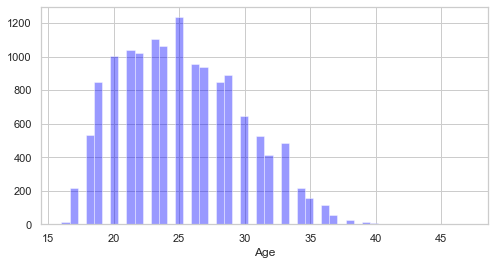

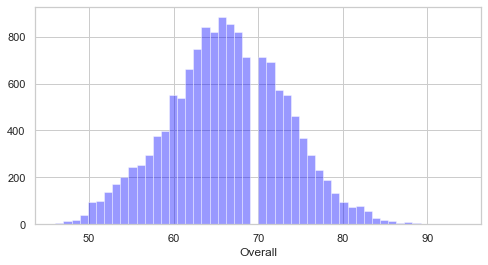

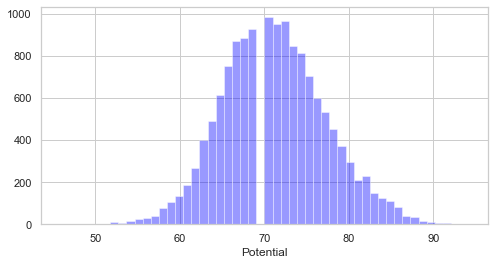

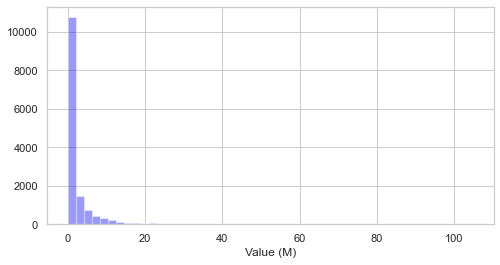

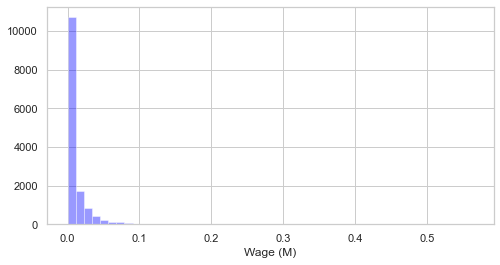

In [4]:
# Code Starts here
numcols= train.select_dtypes(include=['number']).columns.tolist()
for i in numcols:
    plt.figure(figsize=(8,4))
    sns.set_style('whitegrid')
    sns.distplot(train[i],kde=False,color='blue')
    plt.show()







# Code ends here

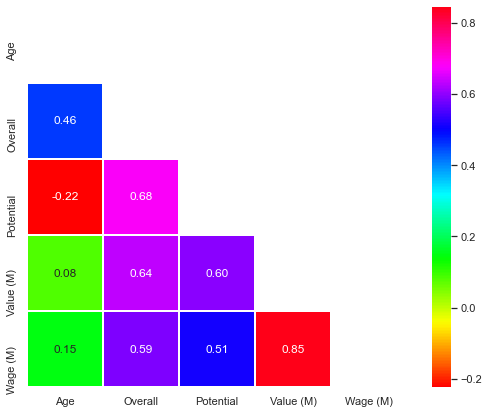

In [5]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [13]:
# Code Starts here
Y=train['Value (M)']
X=train.drop(['Value (M)','Age'],axis=1)




X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

poly = PolynomialFeatures(5)
X_train_2=poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)


model=LinearRegression()
model.fit(X_train_2,y_train)
y_pred=model.predict(X_test_2)

rme=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(rme,r2)




# Code ends here

0.8199533541796538 0.9549481143923584


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
# Code Starts here
id_ = test['Id']

# Dropping the same columns from the test data
test = test[['Overall','Potential','Wage (M)']]

# Applying rfe on test data
test_poly = poly.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_poly)
print(y_pred_test)
y_pred_test = y_pred_test.flatten()
print(y_pred_test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})







# Code ends here

[16.51822936 16.34970215  0.95592399 ...  0.97984073 10.51483895
  3.23051243]
[16.51822936 16.34970215  0.95592399 ...  0.97984073 10.51483895
  3.23051243]


In [15]:
sample_submission.to_csv('FIFA.csv',index=False)